# UPWORK Data Analyst Job Postings Analysis

## Background

Upwork is one of the world's largest freelancing platforms where businesses can find experts for any job, on-demand. As digital transformation continues to shape industries, there's been a surging demand for specialized roles, particularly in data analysis. Platforms like Upwork are filled with numerous job postings from businesses actively seeking data expertise.

### Objective

The main objective of this analysis is to understand the current market demand for Data Analysts on Upwork, gain insights and identify trends about job posts, focusing on aspects like pay, skills listed, and various other factors.

### Data Source

The data has been scraped from Upwork on October 31st, 2023 targeting posts that are included under the "Data Analysis & Testing" and "Data Design & Visualization" filters.

It contains details like:
- Job title
- Job domestic label
- Job description
- Skills required
- Pay rate (either hourly or fixed)
- Job duration
- Experience level
- Remote option
- Contract to hire option
- Project type

### Importance

Understanding the job market trends can be beneficial for:

- **Freelancers/Data Analysts**: Helps in understanding what skills are in demand, which areas to upskill in, and what freelance employers are currently paying for such roles.

### Analysis Overview

In the subsequent sections, we will:

1. **Data Cleaning**: Clean the dataset to remove any inconsistencies and prepare it for analysis.
  
2. **Exploratory Data Analysis (EDA)**: Dive deep into the data to uncover patterns and trends.
  
3. **Visual Analysis**: Use graphs and charts to visually represent our findings and insights.
  
4. **Conclusion**: Summarize the main findings from our analysis.

Let's dive into the data!

### Importing The Necessary Libraries

In [244]:
import re  # For regular expression operations
import json # For using json files
import numpy as np  # Scientific computing
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Data visualization based on matplotlib
import matplotlib.pyplot as plt  # Plotting library
from sklearn.cluster import KMeans  # KMeans clustering algorithm
from sklearn.metrics import silhouette_score  # Evaluate the quality of clusters

### Data Loading

Loading the Dataset from JSON and create a Pandas DataFrame from it.

In [245]:
# Open and read the JSON file
with open(r'..\output\job_data.json', 'r') as file:
    data = json.load(file)

# Convert the list of dictionaries to DataFrame
df = pd.DataFrame(data)

### Initial Data Exploration & Data Cleaning

- Doing initial data exploration by using the head(), info() methods, .shape, and .duplicated().sum() to check out the dataframe's columns, variables types, number of rows/columns, etc.
- Cleaning the Data by Removing Duplicates.

In [246]:
# Print the first 5 rows of the dataframe
df.head()

,job_id,title,domestic_label,description,project_type,hours_per_week,duration,experience_level,min_hourly_rate,max_hourly_rate,fixed_price,contract_to_hire,remote_job,skills
0,~011,Dashboard Builder (Data Analyst),Worldwide,RightCustomer.com invites applications for a s...,Ongoing project,More than 30,6+ months,Intermediate,10.0,40.0,NaN,True,False,"[Data Analysis, Data Visualization, API Integr..."
1,~016,"Data Analyst Expert (Power BI, HubSpot, CRM) F...",Worldwide,*** LOOKING FOR CANADIAN OR USA DEVELOPER ONLY...,Ongoing project,More than 30,3-6 months,Expert,35.0,65.0,NaN,False,False,"[Data Analysis, Data Visualization, Tableau, M..."
2,~017,Excel Data Analyst and Visualization Specialist,Worldwide,I am seeking a skilled individual to assist in...,Ongoing project,Less than 30,1-3 months,Intermediate,NaN,NaN,NaN,False,False,"[Data Visualization, Data Entry, Dashboard, Mi..."
3,~01,Sales Analyst for Comprehensive Client Reporti...,Worldwide,Project Description: We are a rapidly expandin...,Ongoing project,More than 30,6+ months,Intermediate,10.0,20.0,NaN,True,False,"[Data Analysis, Data Visualization, Data Entry..."
4,~0170,Financial market analysis,Worldwide,We are researching NASDAQ stock market etc for...,Ongoing project,More than 30,3-6 months,Intermediate,15.0,40.0,NaN,True,False,"[Data Visualization, Digital Mapping, Presenta..."


In [247]:
# Printing dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_id            340 non-null    object 
 1   title             340 non-null    object 
 2   domestic_label    340 non-null    object 
 3   description       340 non-null    object 
 4   project_type      340 non-null    object 
 5   hours_per_week    245 non-null    object 
 6   duration          262 non-null    object 
 7   experience_level  340 non-null    object 
 8   min_hourly_rate   213 non-null    float64
 9   max_hourly_rate   212 non-null    float64
 10  fixed_price       78 non-null     float64
 11  contract_to_hire  340 non-null    bool   
 12  remote_job        340 non-null    bool   
 13  skills            340 non-null    object 
dtypes: bool(2), float64(3), object(9)
memory usage: 32.7+ KB


In [248]:
# Print the shape
df.shape

(340, 14)

In [249]:
# Check for duplicates
duplicates_count = df.duplicated(subset=[col for col in df.columns if col != 'skills']).sum()
print(duplicates_count)

2


In [250]:
# Drop duplicates
df.drop_duplicates(subset=[col for col in df.columns if col != 'skills'], inplace=True)

In [251]:
# Printing dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 339
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_id            338 non-null    object 
 1   title             338 non-null    object 
 2   domestic_label    338 non-null    object 
 3   description       338 non-null    object 
 4   project_type      338 non-null    object 
 5   hours_per_week    243 non-null    object 
 6   duration          260 non-null    object 
 7   experience_level  338 non-null    object 
 8   min_hourly_rate   212 non-null    float64
 9   max_hourly_rate   211 non-null    float64
 10  fixed_price       78 non-null     float64
 11  contract_to_hire  338 non-null    bool   
 12  remote_job        338 non-null    bool   
 13  skills            338 non-null    object 
dtypes: bool(2), float64(3), object(9)
memory usage: 35.0+ KB


In [252]:
# Print the shape
df.shape

(338, 14)

Key observations:
- There are 338 rows and 14 columns in the dataset. Before cleaning, there are 340 rows and 14 columns in the dataset.
- Data contain duplicate rows that already removed.
- Data contain null values in specific columns. Depends on its type of job type like hourly or fixed.

### Descriptive Analysis of Hourly Rate & Fixed Price

Using the describe() function to gain an initial understanding of the data's distribution and key statistics specifically for the hourly rate and fixed price columns. Also hourly rate and fixed price columns grouped by the domestic label and experience level.

In [253]:
# Calculate average hourly rate
df['average_hourly_rate'] = df[['min_hourly_rate', 'max_hourly_rate']].mean(axis=1)

# Conditionally set NaN where either min_hourly_hour or max_hourly_hour is NaN
df['average_hourly_rate'] = np.where(
    df['min_hourly_rate'].notnull() & df['max_hourly_rate'].notnull(),
    df['average_hourly_rate'],
    np.NaN
)

In [254]:
# Get the describe DataFrame
description = df[['min_hourly_rate', 'max_hourly_rate', 'average_hourly_rate', 'fixed_price']].describe()

# Apply dollar formatting conditionally
for col in description.columns:
    for idx in description.index:
        if idx != 'count':
            description.at[idx, col] = '${:,.2f}'.format(description.at[idx, col])

print(description)


      min_hourly_rate max_hourly_rate average_hourly_rate fixed_price
count           212.0           211.0               211.0        78.0
mean           $22.59          $51.67              $37.07     $798.97
std            $16.84          $43.87              $28.69   $1,805.91
min             $3.00           $5.00               $4.00       $5.00
25%            $10.00          $25.00              $18.00      $41.25
50%            $17.00          $50.00              $33.50     $106.00
75%            $35.00          $75.00              $52.00     $500.00
max           $100.00         $450.00             $262.50  $10,000.00


C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\618136731.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$22.59' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.at[idx, col] = '${:,.2f}'.format(description.at[idx, col])
C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\618136731.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$51.67' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.at[idx, col] = '${:,.2f}'.format(description.at[idx, col])
C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\618136731.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$37.07' has dtype incompatible with float64, please explicitly cast to a compatible dtype 

Key observations:
- The lowest hourly rate is $5.0 and the highest hourly rate is $450
- The mean of the hourly rate starts from $22.59 to $51.67 with median of $37.07
- Notable standard deviation is from the fixed price column with $1,805.91 and mean of $798.97
- While the hourly standard deviation roughly increases not more than $16

Using describe() function to gain an initial understanding of average hourly rate and fixed price for each domestic label.

In [255]:
# Extract unique labels from the 'domestic_label' column
domestic_label = df['domestic_label'].value_counts().index.tolist()

for label in domestic_label:
    # Filter the dataframe by the current label
    domestic_filtered_df = df[df['domestic_label'] == label]
    
    # Get descriptive statistics for the 'fixed_price' column for the filtered dataframe
    description = domestic_filtered_df['fixed_price'].describe()
    
    # Loop through each index of the descriptive statistics (like 'mean', 'std', etc.)
    for idx in description.index:
        if idx != 'count':
            # Apply dollar formatting to the current index value
            description.loc[idx] = '${:,.2f}'.format(description[idx])
    
    # Print the descriptive statistics for the current label
    print(f"Description for {label}:\n")
    print(description)
    print("-" * 50)  # This line prints a series of "-" characters as a separator


Description for Worldwide:

count          75.0
mean        $737.60
std       $1,774.85
min           $5.00
25%          $40.00
50%         $100.00
75%         $500.00
max      $10,000.00
Name: fixed_price, dtype: object
--------------------------------------------------
Description for U.S. only:

count          3.0
mean     $2,333.33
std      $2,309.40
min      $1,000.00
25%      $1,000.00
50%      $1,000.00
75%      $3,000.00
max      $5,000.00
Name: fixed_price, dtype: object
--------------------------------------------------


C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\3942739407.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$737.60' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.loc[idx] = '${:,.2f}'.format(description[idx])
C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\3942739407.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$2,333.33' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.loc[idx] = '${:,.2f}'.format(description[idx])


Key observations:
- U.S. only has really high start of fixed price with $1,000 and while worldwide has $5. Needed more data to check because U.S. only has 3 data.
- One thing seems common both have high standard deviation. U.S. only has $2,309 and worldwide has $1,774
- This causes in Worldwide group in each quartile increases significantly

In [256]:
# Extract unique labels from the 'domestic_label' column
domestic_label = df['domestic_label'].value_counts().index.tolist()

for label in domestic_label:
    # Filter the dataframe by the current label
    domestic_filtered_df = df[df['domestic_label'] == label]
    
    # Get descriptive statistics for the 'average_hourly_rate' column for the filtered dataframe
    description = domestic_filtered_df['average_hourly_rate'].describe()
    
    # Loop through each index of the descriptive statistics (like 'mean', 'std', etc.)
    for idx in description.index:
        if idx != 'count':
            # Apply dollar formatting to the current index value
            description.loc[idx] = '${:,.2f}'.format(description[idx])
    
    # Print the descriptive statistics for the current label
    print(f"Description for {label}:\n")
    print(description)
    print("-" * 50)  # This line prints a series of "-" characters as a separator


Description for Worldwide:

count      182.0
mean      $33.40
std       $28.38
min        $4.00
25%       $15.00
50%       $30.75
75%       $45.00
max      $262.50
Name: average_hourly_rate, dtype: object
--------------------------------------------------
Description for U.S. only:

count       29.0
mean      $60.09
std       $18.25
min       $27.50
25%       $47.50
50%       $61.50
75%       $67.50
max      $100.00
Name: average_hourly_rate, dtype: object
--------------------------------------------------


C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\2713998285.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$33.40' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.loc[idx] = '${:,.2f}'.format(description[idx])
C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\2713998285.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$60.09' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.loc[idx] = '${:,.2f}'.format(description[idx])


Key observations:
- Interestingly, the hourly rate in U.S. only mean roughly matches with ziprecruiter.com end of the tail of data analyst salary in U.S. with $66.35
- The mean of U.S. only twice higher than worldwide. Also each point in U.S. only is higher than worldwide except for the maximum value.
- The standard deviation of worldwide is higher than U.S. only. With $28 and $18 respectively.

Using describe() function to gain an initial understanding of average hourly rate and fixed price for each experience level.

In [257]:
# Extract unique labels from the 'experience_level' column
experience_level = df['experience_level'].value_counts().index.tolist()

for level in experience_level:
    # Filter the dataframe by the current label
    level_filtered_df = df[df['experience_level'] == level]
    
    # Get descriptive statistics for the 'fixed_price' column for the filtered dataframe
    description = level_filtered_df['fixed_price'].describe()
    
    # Loop through each index of the descriptive statistics (like 'mean', 'std', etc.)
    for idx in description.index:
        if idx != 'count':
            # Apply dollar formatting to the current index value
            description.loc[idx] = '${:,.2f}'.format(description[idx])
    
    # Print the descriptive statistics for the current label
    print(f"Description for {level}:\n")
    print(description)
    print("-" * 50)  # This line prints a series of "-" characters as a separator


C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\1613234438.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$704.71' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.loc[idx] = '${:,.2f}'.format(description[idx])
C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\1613234438.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$1,103.50' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.loc[idx] = '${:,.2f}'.format(description[idx])
C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\1613234438.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$28.62' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  descr

Description for Intermediate:

count         38.0
mean       $704.71
std      $1,404.72
min         $10.00
25%         $50.00
50%        $125.00
75%        $550.00
max      $5,500.00
Name: fixed_price, dtype: object
--------------------------------------------------
Description for Expert:

count          32.0
mean      $1,103.50
std       $2,342.12
min           $5.00
25%          $51.25
50%         $200.00
75%         $600.00
max      $10,000.00
Name: fixed_price, dtype: object
--------------------------------------------------
Description for Entry level:

count       8.0
mean     $28.62
std      $29.97
min       $5.00
25%       $6.50
50%      $11.00
75%      $52.50
max      $80.00
Name: fixed_price, dtype: object
--------------------------------------------------


Key observations:
- Only Entry level has low standard deviation with $28 while Intermediate and Expert has $1,400 and $2,300 respectively.
- This causes each points in the quartile for intermediate and expert increases significantly.
- The lob sided trend continue also in the mean with entry level has $28, intermediate has $704, and expert has $1,100

In [258]:
# Extract unique labels from the 'experience_level' column
experience_level = df['experience_level'].value_counts().index.tolist()

for level in experience_level:
    # Filter the dataframe by the current label
    level_filtered_df = df[df['experience_level'] == level]
    
    # Get descriptive statistics for the 'average_hourly_rate' column for the filtered dataframe
    description = level_filtered_df['average_hourly_rate'].describe()
    
    # Loop through each index of the descriptive statistics (like 'mean', 'std', etc.)
    for idx in description.index:
        if idx != 'count':
            # Apply dollar formatting to the current index value
            description.loc[idx] = '${:,.2f}'.format(description[idx])
    
    # Print the descriptive statistics for the current label
    print(f"Description for {level}:\n")
    print(description)
    print("-" * 50)  # This line prints a series of "-" characters as a separator


Description for Intermediate:

count      124.0
mean      $31.58
std       $26.85
min        $4.00
25%       $15.00
50%       $33.50
75%       $35.00
max      $262.50
Name: average_hourly_rate, dtype: object
--------------------------------------------------
Description for Expert:

count       75.0
mean      $49.41
std       $29.04
min        $4.00
25%       $28.75
50%       $50.00
75%       $58.25
max      $200.00
Name: average_hourly_rate, dtype: object
--------------------------------------------------
Description for Entry level:

count      12.0
mean     $16.67
std      $12.39
min       $4.50
25%       $7.25
50%      $15.75
75%      $21.00
max      $49.50
Name: average_hourly_rate, dtype: object
--------------------------------------------------


C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\2658041813.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$31.58' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.loc[idx] = '${:,.2f}'.format(description[idx])
C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\2658041813.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$49.41' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  description.loc[idx] = '${:,.2f}'.format(description[idx])
C:\Users\Rauf Hamidy\AppData\Local\Temp\ipykernel_10280\2658041813.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$16.67' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  descripti

Key observations:
- Interestingly the mean kinda mirrored ziprecruiter.com 0 to 75th percentile with starting on $14 and ending on $46. While the data shows mean starts at $16.67 and ends at $49.41
- The standard deviation of intermediate and expert only differs by $2 while entry level has $12
- If we looked a ziprecruiter.com data, the highest salary for data analyst is $66.35. The expert level 75th percentile is $58. Shows that the 75th percentile of expert level is higher than the highest salary for data analyst in ziprecruiter.com. This is should be obvious because the data is collected from freelance platform.
- Interesting note intermediate has higher maximum value than expert.

### Value Counts of Categorical Columns

Using the value_counts() function to understand the distribution of the categorical columns. Specifically, we will look at the domestic_label, hours_per_week, job duration, experience level, remote option, contract to hire option, and project type columns.

In [259]:
# Count the number of unique values in domestic_label column
counts = df['domestic_label'].value_counts()
# Get the percentages
percentages = df['domestic_label'].value_counts(normalize=True) * 100
# Concatenate the two together for display
combined = pd.concat([counts, percentages], axis=1, keys=['Counts', 'Percentage'])
print(combined)

                Counts  Percentage
domestic_label                    
Worldwide          291   86.094675
U.S. only           47   13.905325


In [260]:
# Count the number of unique values in project_type column
counts = df['project_type'].value_counts()
# Get the percentages
percentages = df['project_type'].value_counts(normalize=True) * 100
# Concatenate the two together for display
combined = pd.concat([counts, percentages], axis=1, keys=['Counts', 'Percentage'])
print(combined)

                  Counts  Percentage
project_type                        
Ongoing project      183   54.142012
One-time project     140   41.420118
Complex project       15    4.437870


In [261]:
# Count the number of unique values in hours_per_week column
counts = df['hours_per_week'].value_counts()
# Get the percentages
percentages = df['hours_per_week'].value_counts(normalize=True) * 100
# Concatenate the two together for display
combined = pd.concat([counts, percentages], axis=1, keys=['Counts', 'Percentage'])
print(combined)

                Counts  Percentage
hours_per_week                    
Less than 30       167    68.72428
More than 30        76    31.27572


In [262]:
# Count the number of unique values in duration column
counts = df['duration'].value_counts()
# Get the percentages
percentages = df['duration'].value_counts(normalize=True) * 100
# Concatenate the two together for display
combined = pd.concat([counts, percentages], axis=1, keys=['Counts', 'Percentage'])
print(combined)

            Counts  Percentage
duration                      
1-3 months      78   30.000000
< 1 month       71   27.307692
6+ months       68   26.153846
3-6 months      43   16.538462


In [263]:
# Count the number of unique values in experience_level column
counts = df['experience_level'].value_counts()
# Get the percentages
percentages = df['experience_level'].value_counts(normalize=True) * 100
# Concatenate the two together for display
combined = pd.concat([counts, percentages], axis=1, keys=['Counts', 'Percentage'])
print(combined)

                  Counts  Percentage
experience_level                    
Intermediate         186   55.029586
Expert               121   35.798817
Entry level           31    9.171598


In [264]:
# Count the number of unique values in contract_to_hire column
counts = df['contract_to_hire'].value_counts()
# Get the percentages
percentages = df['contract_to_hire'].value_counts(normalize=True) * 100
# Concatenate the two together for display
combined = pd.concat([counts, percentages], axis=1, keys=['Counts', 'Percentage'])
print(combined)

                  Counts  Percentage
contract_to_hire                    
False                215   63.609467
True                 123   36.390533


In [265]:
# Count the number of unique values in remote_job column
counts = df['remote_job'].value_counts()
# Get the percentages
percentages = df['remote_job'].value_counts(normalize=True) * 100
# Concatenate the two together for display
combined = pd.concat([counts, percentages], axis=1, keys=['Counts', 'Percentage'])
print(combined)

            Counts  Percentage
remote_job                    
False          338       100.0


## Data Visual Exploration

Setting the seaborn theme and style.

In [266]:
sns.set_theme(style="whitegrid") # Set Seaborn aesthetic style with a white background and gridlines
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300}) # Set resolution of plots in notebook and when saved as image
sns.set_context('notebook') # Optimize plot elements' scale for Jupyter notebook display
sns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size":8}) # Show ticks on axes and set major tick sizes

# Display Matplotlib plots in Jupyter notebook cells
%matplotlib inline

### Distribution Visualization

Defining a function to plot the distribution of hourly rate & fixed price. Then using the function to plot the distribution of hourly rate & fixed price.

In [267]:
def single_distribution(column, num_bins, y_ticks, filter_condition=None):
    plt.figure(figsize=(7.5, 5))
    
    # Filter data based on the provided condition if any
    data_to_plot = df[column]
    if filter_condition is not None:
        data_to_plot = df[column][filter_condition]
    
    # Capitalize the column name for better presentation
    column_text = column.replace('_', ' ').capitalize()

    # Plot
    ax = sns.histplot(data_to_plot, kde=True, bins=num_bins, color='blue')
    
    # Annotate the bars with the count of data points
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontweight='bold')
        
    # Add vertical lines for quartiles
    q25, q50, q75 = data_to_plot.quantile([0.25, 0.5, 0.75])
    ax.axvline(q25, color='y', linestyle='--', linewidth=1)
    ax.axvline(q50, color='y', linestyle='-', linewidth=1)
    ax.axvline(q75, color='y', linestyle='--', linewidth=1)
        
    # Calculate mean, standard deviation, and total data points
    mean_value = data_to_plot.mean()
    std_deviation = data_to_plot.std()
    total_data_points = len(data_to_plot.dropna())
    
    # Add legend with mean, standard deviation, and total data points
    legend_text = [f"Mean: {mean_value:.2f}",
                   f"Std Dev: {std_deviation:.2f}",
                   f"Total: {total_data_points}"]
    legend = plt.legend(legend_text)
    legend.get_frame().set_facecolor((0.8, 0.8, 0.8, 0.8))
    
    # Set the title, x-label, and y-ticks
    plt.title(f"Distribution of {column_text}", fontweight='bold')
    plt.xlabel(f"{column_text}")
    plt.yticks(y_ticks)
    
    plt.tight_layout()
    plt.show()

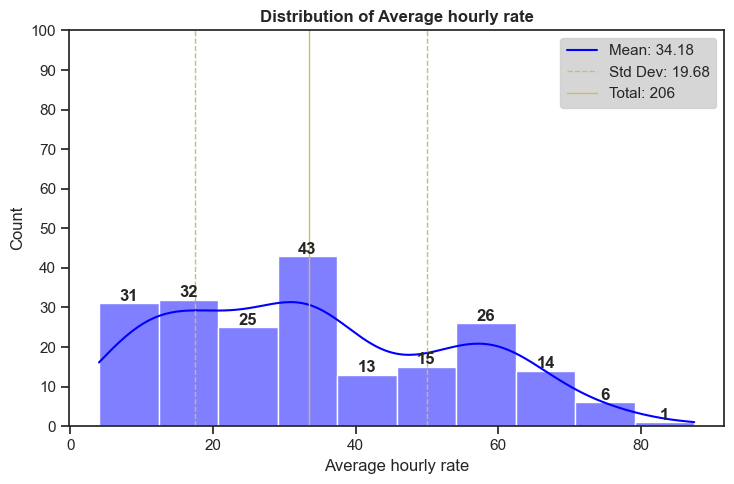

In [268]:
# Create a filter condition
condition = df['average_hourly_rate'] < 100
# Plot the distribution of average_hourly_rate
single_distribution('average_hourly_rate', 10, range(0, 110, 10), filter_condition=condition)

Key observations:
- Mean of hourly rate are $34
- The 25th percentile of hourly rate are $15 and 75th percentile are around $53
- The distribtion are slightly positively skewed

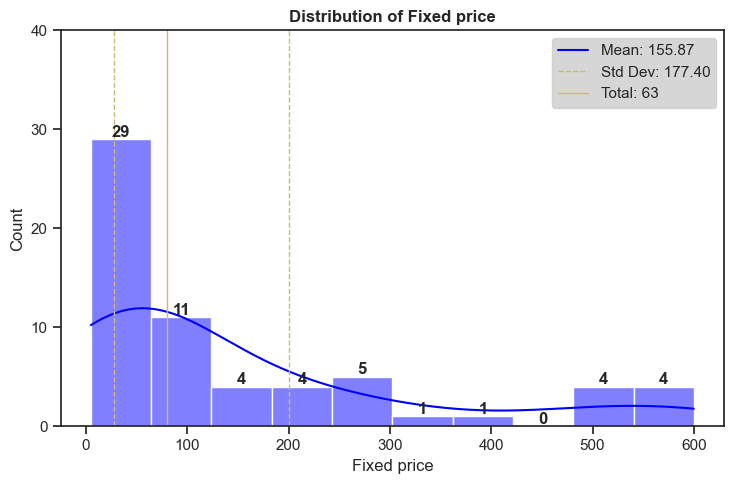

In [269]:
# Create a filter condition
condition = df['fixed_price'] < 1000
# Plot the distribution of fixed_price
single_distribution('fixed_price', 10, range(0, 50, 10), filter_condition=condition)

Key observations:
- Mean of fixed price are $155
- The distribtion are positively skewed, meaning most of the fixed job posts are below the mean

### Regression Plots of Hourly Rate & Job Post Duration

Defining a function regression plot of Hourly Rate & Job Post Duration. Then using the function to plot the regression Hourly Rate & Job Post Duration.

In [270]:
def single_regression(df, x, y):
    plt.figure(figsize=(7.5, 5))
    
    # Capitalize the column names for better presentation
    x_text = x.replace('_', ' ').capitalize()
    y_text = y.replace('_', ' ').capitalize()

    # Calculate the correlation coefficient
    correlation_coefficient = df[x].corr(df[y])

    # Regression plot
    sns.regplot(x=x, y=y, data=df)
    
    # Set the title, x-label, and y-label
    plt.title(f'Regression of {y_text} on {x_text}', fontweight='bold')
    plt.xlabel(f"{x_text}")
    plt.ylabel(f"{y_text}")

    # Annotate with the correlation coefficient
    plt.annotate(f"r = {correlation_coefficient:.2f}",
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()

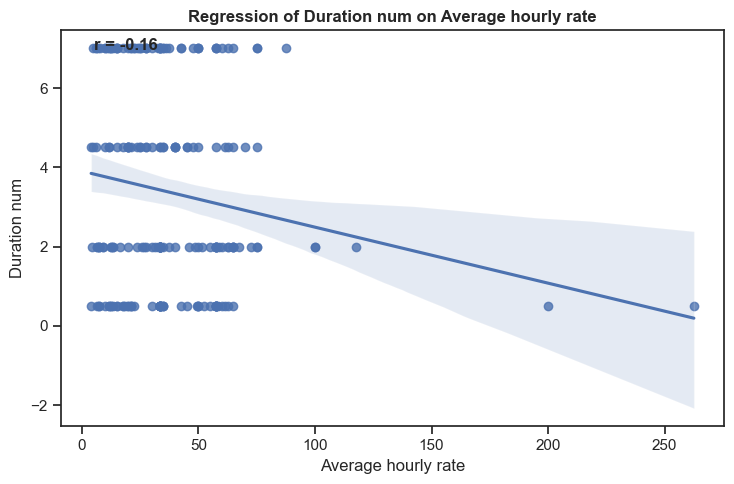

In [271]:
# Convert duration categories to numerical values
duration_mapping = {
    '< 1 month': 0.5,  # Taking average of 0 to 1
    '1-3 months': 2,   # Taking average of 1 to 3
    '3-6 months': 4.5, # Taking average of 3 to 6
    '6+ months': 7     # Just a value greater than 6, can be adjusted
}

df['duration_num'] = df['duration'].map(duration_mapping)

single_regression(df, 'average_hourly_rate', 'duration_num')

Key observations:
- r value of -0.16 implies a weak negative linear relationship between the two variables being analyzed

### Skills Distribution

Defining a function to plot the distribution of skills. Then using the function to plot the distribution of skills.

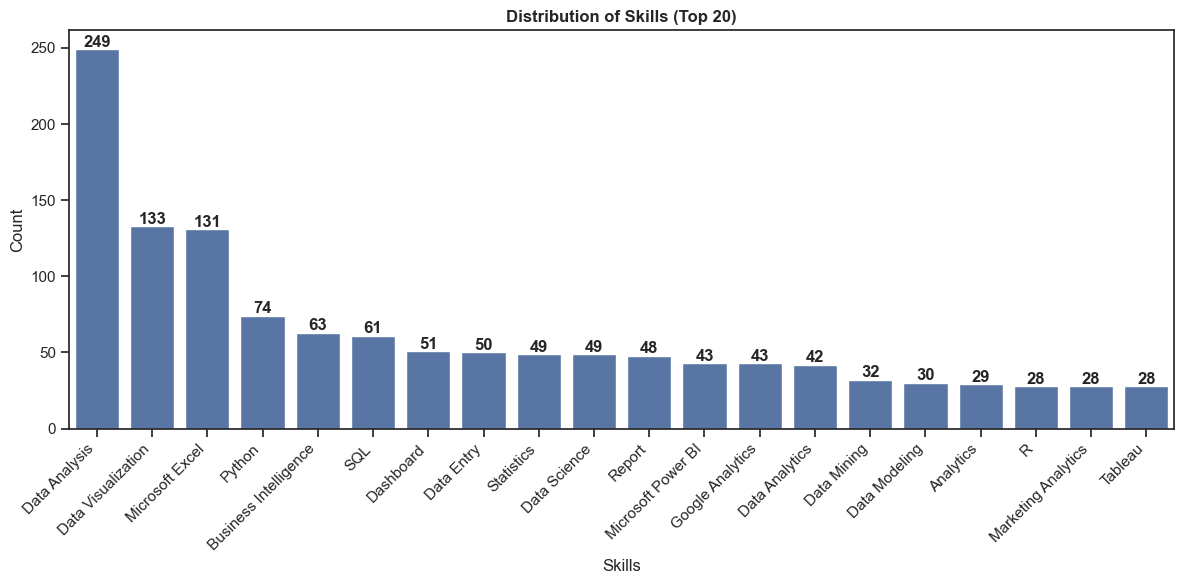

In [272]:
def skills_distribution(column, top_n=10, filter_condition=None):
    plt.figure(figsize=(12, 6))
    
    # Filter data based on the provided condition if any
    data_to_plot = df[column]
    if filter_condition is not None:
        data_to_plot = data_to_plot[filter_condition]
    
    # Get counts for each category
    counts = data_to_plot.value_counts().head(top_n)
    
    # Capitalize the column name for better presentation
    column_text = column.replace('_', ' ').capitalize()

    # Plot
    ax = sns.barplot(x=counts.index, y=counts.values)  # Removed the 'palette' parameter
    
    # Annotate the bars with the count of data points
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontweight='bold')
    
    # Set the title and x-label
    plt.title(f"Distribution of {column_text} (Top {top_n})", fontweight='bold')
    plt.xlabel(f"{column_text}")
    plt.ylabel("Count")
    
    plt.xticks(rotation=45, ha='right') # Rotate the x-axis labels for better visibility
    
    plt.tight_layout()
    plt.show()

# Your code for using the function
df = df.explode('skills')
skills_distribution('skills', 20)


Key observations:
- The top tools-based skills are: Microsoft Excel, Python, SQL, Microsoft Power BI, Google Analytics, R, Tableau. Most of the listed skills are name of the role itself like data analysis, data visualization, data science, etc.
- Microsoft Excel demand exceeds python and SQL by 2 times.
- Microsft Power BI also exceeds demand of Tableau
- Python still ahead of R programming language more than 2 times

### UPDATES November 6th, 2023

I am updating the analysis by including the data of job description. I am using GPT 3.5 to classify the job description.

Disclaimer: I am not sure how accurate the classification is. To know if the classification is accurate, I need to test the model with training data, that already classified correctly.

In [273]:
# Open and read the JSON file
with open(r'..\output\gpt3_analysis.json', 'r') as file:
    data = json.load(file)

# Convert the list of dictionaries to DataFrame
df = pd.DataFrame(data)

# Print the first 5 rows of the dataframe
df.head()

,id,analysis
0,0,"Data Analyst (Excel), Data Visualization"
1,1,"Data Analyst (Excel), Data Visualization"
2,2,"Data Analyst (Excel), Data Visualization"
3,3,"Data Analyst (Excel), Data Visualization"
4,4,"Data Analyst (Excel), Data Analyst (Python)"


In [274]:
# Flatten the lists
flattened_labels = df['analysis'].str.split(', ').explode().reset_index(drop=True)
# Perform value_counts on the flattened data
flattened_labels.value_counts()

analysis
Data Visualization                     191
Data Analyst (Excel)                   168
Non Data Analyst Job                   121
Data Analyst (Python)                  116
Data Analyst (SQL)                      13
Data Analyst (Data Visualization)        8
Data Analyst (Non Data Analyst Job)      8
Data Analyst (Tableau)                   4
Data Analyst (Power BI)                  3
Data Analyst                             1
Data Engineer                            1
Data Analyst (ETL)                       1
GA4)                                     1
Google Tag Manager                       1
Data Analyst (Google Analytics           1
Data Modeler                             1
Data Analyst (SPSS)                      1
Data Analyst (Data Analytics)            1
Data Analyst (NLP)                       1
Statistical Analysis                     1
Data Modeling                            1
Data Analyst (SAS)                       1
Data Analysis                            1
Da

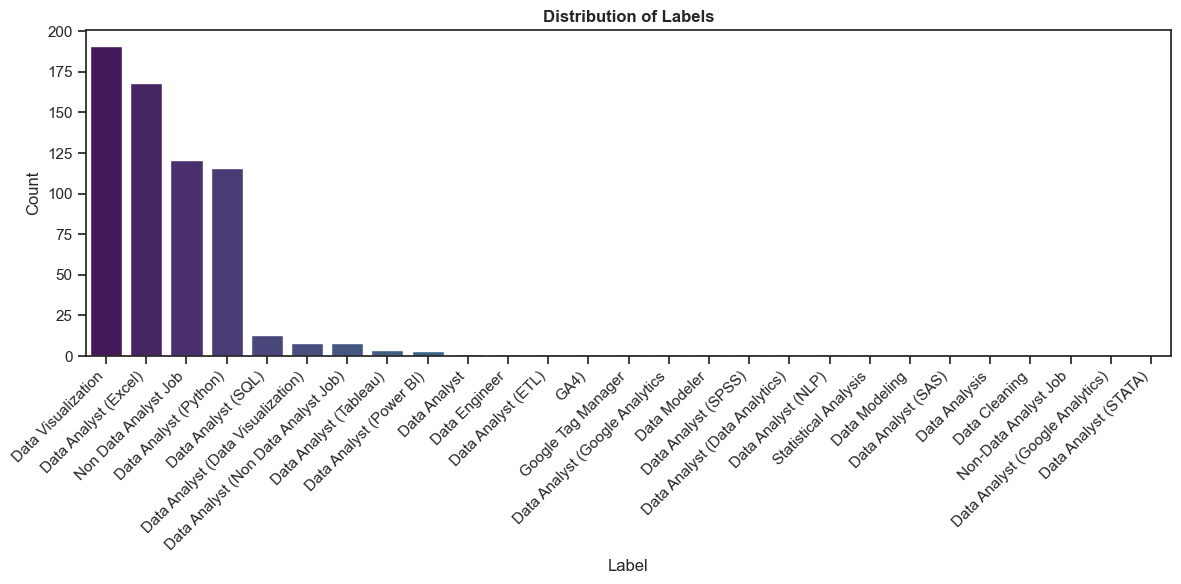

In [275]:
# Display distribution of labels
value_counts = flattened_labels.value_counts()
df_value_counts = pd.DataFrame({'Label': value_counts.index, 'Count': value_counts.values})


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Label', y='Count', data=df_value_counts, hue='Label', palette='viridis', legend=False)
plt.title("Distribution of Labels", fontweight='bold')
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right') # Rotate the x-axis labels for better visibility
plt.tight_layout()
plt.show()


Key observations:
- Most of the job or more than half in upwork with keyword data analyst are related to creating data visualization
- In terms of excel near half of the job requires usage of excel
- Usage of python is roughly equal to job that classified as non data analyst job by GPT 3.5

## Conclusion and Insights

### Summary of Findings:
1. **Skill Popularity:** The most demanded tool-based skills on our dataset are Microsoft Excel, Python, SQL, Microsoft Power BI, Google Analytics, R, Tableau.
   
2. **Duration & Average Hourly Rate Regression Analysis:** With r value of -0.16 implies a weak negative linear relationship between the two variables being analyzed.

3. **Hourly Rates:** On average, the higher experience level, the higher hourly rate. Roughly from Entry level to Intermediate level jumps around $20. While Intermediate to Expert level jumps around $10.